# Hands-On: Gruppentheorie


**Disclaimer**: Viele Variablennamen wurden wiederverwendet zur Verständlichkeit. Damit das Notebook richtig laufen kann, muss deshalb jede Zelle nacheinander aktiviert in der richtigen Reihenfolge werden, weil sonst zu Errors kommt.

## Darstellung

Man kann Punktgruppen und deren Eigenschaften, also wie sie untereinander verknüpfen theoretisch auf viele Arten und Weise darstellen. Aber als praktischste Art haben sich Matrizen dargestellt, in der Physik insbesondere  $\Gamma\in GL(\mathbb{C})^{[3x3]}$

Schließlich kann man Matritzen, so wählen dass sie alle Eigenschaften wie Drehungen, Spiegelungen, Inversion und sonstige im 3D-Raum ausführen, aber vor allem auch abgeschlossen sind, d.h. das Produkt unter den Matrizen einer Gruppe kann nur eine Matrix aus jener Gruppe ergeben. 

### Beispiel:

$$ C_{3v} = \{E, C_3, C_3^2, \sigma_{v}^{(1)}, \sigma_{v}^{(2)}, \sigma_{v}^{(3)}\}$$

wobei <br>
$C_3$: dreizählige Drehung (um Hauptachse = z-Achse) <br>
$\sigma$: Spiegelung um jeweilige Spiegelebene <br>
E: neutrales Element

Die entspricht anschaulich:

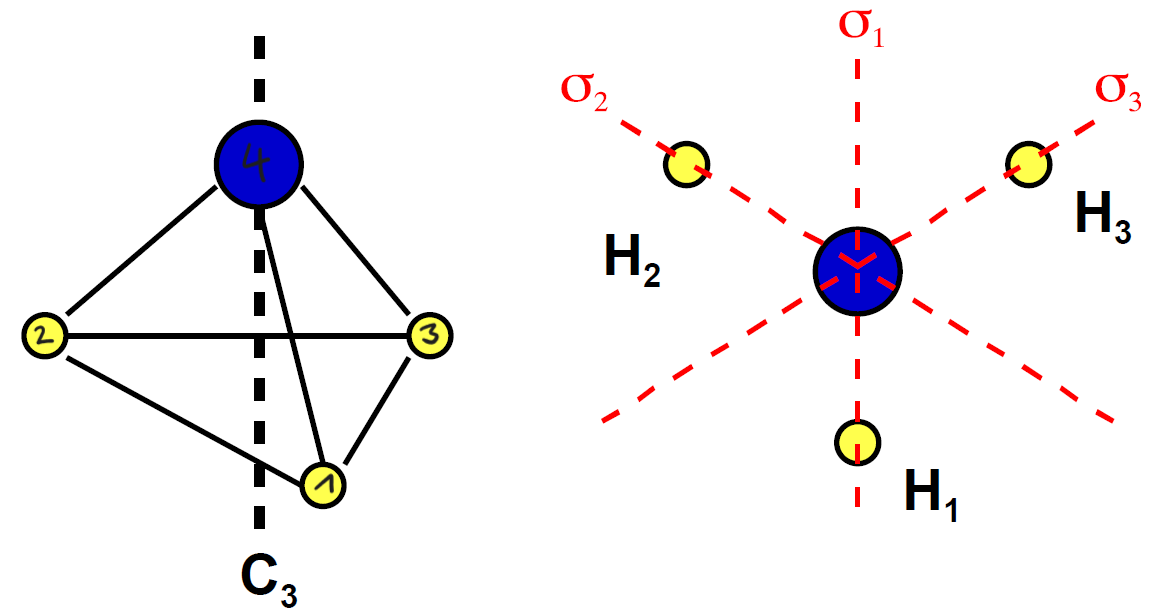

Jedes Element der Gruppe $C_{3v}$ entspricht einer Symmetrieoperation. Das bedeutet klartext, dass die Punkte so umeordnet werden, sodass nach sich nichts verändert. Man merke an, dass ohne dem blauen Kügelschen "4", man eine weiter Symmetrieoperation hätte, nämlich eine weitere Spiegelebene in der x,y-Ebene; durch das Einführen von 4 wurde die Symmetrie reduziert und wir erhalten die Punktgruppe $C_{3v}$.

### die Verknüpfungstafel:





Wir wollen nun die Verknüpfungstafel bestimmen, dies scheint zu Beginn als sehr mühselig. Wir können aber einen Trick verwenden, nämlich drücken wir jedes Gruppenelement als Matrix aus und lassen diese dann verrechnen:

### 1) Matrizen aufstellen

In [1]:
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)

wir wählen folgendes Koordinatensystem:
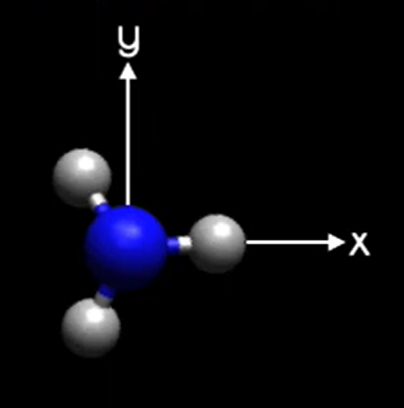


#### Drehmatrix Herleitung (x,y-Ebene):

in Zylinderkoordinaten gilt:
        $$ \left(\begin{array}{c} x \\ y \\ z \end{array}\right) =   \left(\begin{array}{c} r\cdot cos(\alpha) \\ r\cdot sin(\alpha) \\ z \end{array}\right)  $$
        
Nach einer Drehung umde nWinkel $\theta$ gilt dann:

$$ \left(\begin{array}{c} r\cdot cos(\alpha) \\ r\cdot sin(\alpha) \\ z \end{array}\right) \rightarrow   \left(\begin{array}{c} r\cdot cos(\alpha + \theta) \\ r\cdot sin(\alpha + \theta) \\ z \end{array}\right)  $$

mit den Additionstheoremen folgern wir:

$ \left(\begin{array}{c} r\cdot cos(\alpha + \theta) \\ r\cdot sin(\alpha + \theta) \\ z \end{array}\right) =
    \left(\begin{array}{c} r\cdot (cos(\alpha)cos(\theta) - sin(\alpha)sin(\theta))\\ r\cdot( sin(\alpha)cos(\theta) + cos(\alpha)sin(\theta)) \\ z \end{array}\right) = 
    \left(\begin{array}{c} x\cdot cos(\theta) -y\cdot sin(\theta)\\ x\cdot sin(\theta) + y\cdot cos(\theta) \\ z \end{array}\right) 
$

Wir haben beim zweiten Gleichheitszeichen die Zylinderkoordinatendefinition von ganz oben verwendet.
Diese Lineare Gleichungssystem sieht als Matrix ausgedrückt wie folgt aus:

$$
D(\theta) =
\begin{pmatrix}
cos(\theta) & -sin(\theta) & 0\\
sin(\theta) & cos(\theta) & 0\\
0 & 0 & 1
\end{pmatrix}
$$

#### Spiegelmatrix Herleitung (x,y-Ebene und Ursprungsgerade als Spiegel):

Die Ursprungsgerade schließt ein Winkel $\alpha$ mit der x-Achse:

Die Projektion des Vektor $\vec{r}$ auf die Gerade lautet $\vec{p} = (\vec{r}\vec{e_\alpha})\cdot\vec{e_\alpha}$.
Der Verbindungsvektor von $\vec{r}$ zu $\vec{p}$ lautet somit:

$$ \vec{d}  = \vec{p} - \vec{r} = ( x\cdot cos(\alpha) + y\cdot sin(\alpha) ) \cdot \left(\begin{array}{c} cos(\alpha) \\ sin(\alpha) \\ 0 \end{array}\right) - 
\left(\begin{array}{c} x \\ y\\ 0 \end{array}\right)$$


Die eigentliche $\textbf{Spiegelung}$ bedeutet also:

$$ 
\begin{align}
\vec{r'} &= \vec{r} + 2\vec{d} \\
            &= \vec{r} + 2\vec{p} -2\vec{r} \\ 
            &= 2\vec{p} -\vec{r}
\end{align}     
$$

$$ \left(\begin{array}{c} x' \\ y' \\ 0 \end{array}\right) = 2\cdot ( x\cdot cos(\alpha) + y\cdot sin(\alpha) ) \cdot \left(\begin{array}{c} cos(\alpha) \\ sin(\alpha) \\ 0 \end{array}\right) - \left(\begin{array}{c} x \\ y\\ 0 \end{array}\right)$$
Die Lösung des Gleichungssystem lautet:
$$
\begin{align}
x' &= 2xcos(\alpha)cos(\alpha) + 2sin(\alpha)cos(\alpha) - x \\
   &= x\left[ 2cos^2(\alpha) -1\right] + y\left[ 2sin(\alpha)cos(\alpha)\right] \\
   &= x\left[ 2cos^2(\alpha) - ( cos^2(\alpha) + sin^2(\alpha) )\right] + y\left[ sin(2\alpha)\right] \\
   &= x\left[cos^2(\alpha) - sin^2(\alpha)\right] + y\left[sin(2\alpha)\right]  \\
   &= \textbf{x}\left[cos(2\alpha)\right] + \textbf{y}\left[sin(2\alpha)\right]
\end{align}
$$

ganz analog folgt:

$$
\begin{align}
y' &= \textbf{x}\left[sin(2\alpha)\right] - \textbf{y}\left[cos(2\alpha)\right]
\end{align}
$$

Die beschreibene Matrix ist also auch die gesuchte $\textbf{Spiegelmatrix:}$

$$
S(\alpha) =
\begin{pmatrix}
cos(2\alpha) & sin(2\alpha) & 0\\
sin(2\alpha) & -cos(2\alpha) & 0\\
0 & 0 & 1
\end{pmatrix}
$$



<div>
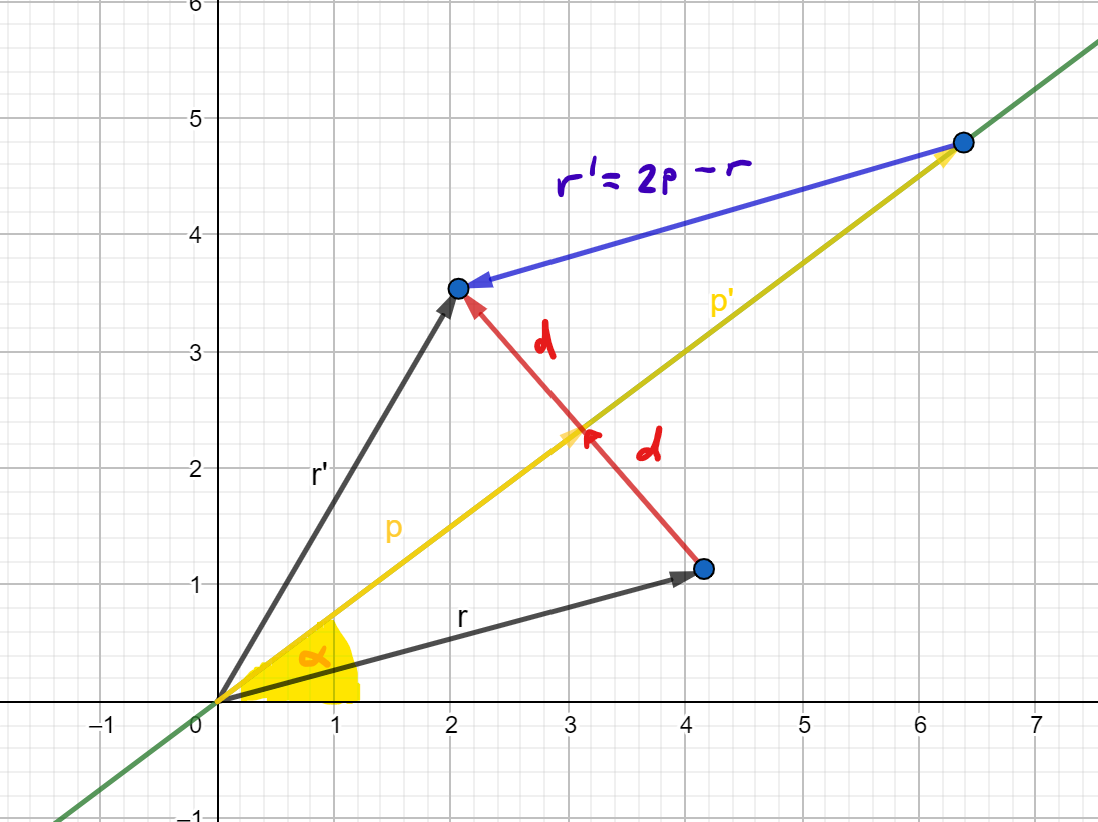
</div>

In [2]:
E = np.identity(3)

# Drehmatrix:
def Drehmatrix(x):
    return np.array([[ np.cos(x), -np.sin(x), 0],
                     [ np.sin(x),  np.cos(x), 0],
                     [    0     ,   0       , 1]])
# Winkel
phi = 2*np.pi/3

C3 = Drehmatrix(phi)
C3_2 = Drehmatrix( 2 * phi)


## Spiegelmatrix:

def Spiegelmatrix(x):
    return np.array([[np.cos(2*x), np.sin(2*x), 0],
                     [np.sin(2*x), -np.cos(2*x),0],
                     [0, 0, 1]])

s1 = Spiegelmatrix(0)
s2 = Spiegelmatrix(phi)
s3 = Spiegelmatrix(2*phi)

### 2) Verknüpfungstafel berechnen



In [3]:
C3v = [E, C3, C3_2, s1, s2, s3]
name = ["E", "C3", "C3_2", "s1", "s2","s3"]

In [4]:
def zuordnen(G,A):
    n = len(G)
    for i in np.arange(n):
        if np.allclose(G[i],A):
            return i, name[i]

def mult(A,B):
    return np.matmul(A,B)


In [5]:
V = np.empty([6,6], dtype=object)

for i in np.arange(6):
    for j in np.arange(6):
        x = mult(C3v[i],C3v[j])
        ind, n = zuordnen(C3v, x)
        V[i,j] = name[ind]
        
Tabelle = pd.DataFrame(V)
TT = Tabelle.set_axis(name, axis="columns")
TT.set_axis(name, axis="index")


,E,C3,C3_2,s1,s2,s3
E,E,C3,C3_2,s1,s2,s3
C3,C3,C3_2,E,s3,s1,s2
C3_2,C3_2,E,C3,s2,s3,s1
s1,s1,s2,s3,E,C3,C3_2
s2,s2,s3,s1,C3_2,E,C3
s3,s3,s1,s2,C3,C3_2,E


## Charaktertafeln
Wie wir oben gesehen haben charakterisieren nicht nur die Elemente eine Gruppe, sondern auch die Verknüpfungstafel. Man erkennt, dass die Verknüpfungstafel eindeutig einer Gruppe zugeordnet ist. Wie Matrizen gibt es auch andere Darstellungen die eine gleiche Verknüpfungstafel erzeugen können und somit die selbe Gruppe repräsentieren, aber halt mit "anderen Elementen". 

Wir werden nun herausfinden, dass es eigentlich nur eine handvoll solcher Repräsentationen gibt, die sich wesentlich unterscheiden und man aus diesen Bausteinen prinzipiell unendlich viele Darstellungen erzeugen kann. Verständnishalber schauen wir uns hier beispielhaft $C_{2v}$ an.

$$
C_{2v} = \{E, C_2, \sigma_{v}^{(1)}, \sigma_{v}^{(2)} \}
$$

<div>
<img src="Methylene_Chloride_Struktur.png" width="400"/>
</div>
(Methylene Chloride, wird u. a. zur Entkoffeiniesierung von Kaffee und Tee verwendet lmao)

In [6]:
E = np.identity(3)
C2 = Drehmatrix(np.pi)
s1 = Spiegelmatrix(0)
s2 = Spiegelmatrix(np.pi/2)

C2v = [E, C2, s1, s2]
name = ["E", "C2", "s1", "s2"]
g = len(C2v)

V = np.empty([g,g], dtype=object)

for i in np.arange(g):
    for j in np.arange(g):
        x = mult(C2v[i],C2v[j])
        ind, n = zuordnen(C2v, x)
        V[i,j] = name[ind]

index = pd.Index(name)
Tabelle = pd.DataFrame(V)
TT = Tabelle.set_axis(name, axis="columns")
TT = TT.set_index(index)
TT

,E,C2,s1,s2
E,E,C2,s1,s2
C2,C2,E,s2,s1
s1,s1,s2,E,C2
s2,s2,s1,C2,E


#### Nun was ist der **Charakter** ?

Die Charaktere $\chi$ sind Matrixspuren, die den Verknüpfungstafel gehorchen, wenn man sie multipliziert.
Die Menge der Charaktere zu jedem jeweiligen Element heißt **Repräsentation einer Gruppe**.

Ganz naiv lässt sich feststellen, das wenn man alle Charaktere gleich 1 setzt, die Verknüpfungstafel immer erfüllt ist, denn z.B.:

$$
C_2\cdot \sigma_1 = \sigma_2
$$
wählen wir aber $$C_2, \sigma_1, \sigma_2 =1$$

ergibt sich: $$ 1\cdot1=1 $$
was unter allen Umständen richtig. Verallgemeinern wir das:

$$ 
\begin{align}
\Gamma_{C_{2v}} &= \{\chi_E, \space \chi_{C_2}, \space \chi_{\sigma_1}, \space \chi_{\sigma_2} \}\\
\Gamma_{(1)}&= \{1 ,\space 1, \space 1, \space 1 \}
\end{align}
$$

#### Wie sähe dann die Verknüpfungstafel aus?

In [7]:
G1 = pd.DataFrame({
    "1": [1,1,1,1],
    "1 ": [1,1,1,1],
    "1  ": [1,1,1,1],
    "1   ": [1,1,1,1]
}).set_axis([1,1,1,1], axis= "index")
G1

,1,1,1,1
1,1,1,1,1
1,1,1,1,1
1,1,1,1,1
1,1,1,1,1


### also offensichtlich immer richtig, gibt es aber weitere nicht triviale $\Gamma_{(2)},\Gamma_{(3)},...$?

Wir wählen $$ \Gamma_{(2)} = \{1,1,-1,-1\}  $$

In [8]:
O=TT.replace(name,[1,1,-1,-1])
O


,E,C2,s1,s2
E,1,1,-1,-1
C2,1,1,-1,-1
s1,-1,-1,1,1
s2,-1,-1,1,1


das funktioniert. Funktioniert das auch?
$$ \Gamma_{(3)} = \{1,-1,-1,-1\}  $$

In [9]:
O=TT.replace(name,[1,-1,-1,-1])
O

,E,C2,s1,s2
E,1,-1,-1,-1
C2,-1,1,-1,-1
s1,-1,-1,1,-1
s2,-1,-1,-1,1


Wir sehen, dass häufig   $-1\cdot (-1)= -1$ ergibt. Das darf nicht sein, also ist $\Gamma_{(3)}$ keine Darstellung!


Wir wollen uns auf ein Minimum beschränken, denn alle Matrizen verhalten sich nach einer Grundalgebra. Die kleinste Menge zu der alle anderen äquivalent sind, heißen **irreduzible Darstellungen**.


Wir werden herausfinden, dass alle irreduziblen Darstellungen von $C_{2v}$ wie folgt lauten:

$$
\begin{align}
\Gamma_{(1)} &= \{1,1,1,1\} \\
\Gamma_{(2)} &= \{1,1,-1,-1\} \\
\Gamma_{(3)} &= \{1,-1,1,-1\} \\
\Gamma_{(4)} &= \{1,-1,-1,1\}
\end{align}
$$

Wir schreiben dies als Tabelle auf:

$$
\begin{array}{ c|c c c c } 
   & E & C_2 & \sigma_1 & \sigma_2 \\ 
\hline
\Gamma_{(1)}  & 1 & 1 & 1 & 1 \\ 
\Gamma_{(2)}   & 1 & 1 &-1 & -1\\ 
\Gamma_{(3)}   & 1 & -1 &1 & -1\\ 
\Gamma_{(4)}   & 1 & -1 &-1 & 1\\ 
\end{array}
$$

Wir geben dem ganzen jetzt mehr Systematik. Dabei benutzen wir die **Mulliken-Symbole** um die Sachen zu benennen.


<div>
<img src="pz_Orbital.png" width="400"/>
</div>
<div>
<img src="px_Orbital.png" width="400"/>
</div>

## Mulliken-Notation
----------------------------

#### 1) Dimension:
an der oberen linken Ecke erkennt man auch die **Dimension**, denn die Spur der Einheitsmatrix ist logischerweise die Dimension. Wir können natürlich Matrizen höherer Dimensionen verwenden, somit gibt es unendlich viele dann.

Die $\Gamma_{(i)}$ werden durch Buchstaben abhängig ihrer Dimension ersetzt:

**1D**:  A,B <br>
**2D**:  E <br>
**3D**:  T

#### 2) Symmmetrie unter Hauptdrehachse C:

Hierbei wird nur der **1D**-Fall betrachtet. Falls unter der Rotationsgruppe C eine 1 steht ist die Gruppe symmetrisch und erhält **A**. Wenn aber eine -1 steht, also unsymmetrisch ist, wählen wir **B**.

$$ 
\begin{align}
A &\leftrightarrow 1 \\
B &\leftrightarrow -1
\end{align}
$$

#### 3) Inversion

Wenn symmetrisch unter *Inversion*, erhält es den **Index g** für gerade.<br>
Wenn antisymmetrisch unter *Inversion*, erhält es den **Index u** für ungerade

#### 4) Index

Wir schauen uns wie bei 2 als nächsten Rotationsachsen (mit natürlicherweise kleinerer Zähligkeit) oder Spiegelebenen an.
Normalerweise wählt man das erste nächste Element. Bei Symmetrie, also +1 unter diesem ergibt sich der Index 1 und bei Anti-Symmetrie, also -1, Index 2.
So können beispielhaft $A_1,A_2,...$ weiter durchnummeriert werden.

Befolgen wir diese Regeln ergibt sich:

Aus
$$
\begin{array}{ c|c c c c } 
   & E & C_2 & \sigma_1 & \sigma_2 \\ 
\hline
\Gamma_{(1)}  & 1 & 1 & 1 & 1 \\ 
\Gamma_{(2)}   & 1 & 1 &-1 & -1\\ 
\Gamma_{(3)}   & 1 & -1 &1 & -1\\ 
\Gamma_{(4)}   & 1 & -1 &-1 & 1\\ 
\end{array}
$$

wird

$$
\begin{array}{ c|c c c c } 
   & E & C_2 & \sigma_1 & \sigma_2 \\ 
\hline
A_1  & 1 & 1 & 1 & 1 \\ 
A_2  & 1 & 1 &-1 & -1\\ 
B_1  & 1 & -1 &1 & -1\\ 
B_2  & 1 & -1 &-1 & 1\\ 
\end{array}
$$

Wir können weiterhin noch die "Anzahl der Gruppenelemente" **h** miteinbauen:
$$
\begin{array}{ c|c c c c } 
 h=4  & E & C_2 & \sigma_1 & \sigma_2 \\ 
\hline
A_1  & 1 & 1 & 1 & 1 \\ 
A_2  & 1 & 1 &-1 & -1\\ 
B_1  & 1 & -1 &1 & -1\\ 
B_2  & 1 & -1 &-1 & 1\\ 
\end{array}
$$.

### Erweiterung
------------------------------

$$
\begin{array}{ c|c c c c | c | c } 
 h=4  & E & C_2 & \sigma_1 & \sigma_2 \\ 
\hline
A_1  & 1 & 1 & 1 & 1  & z  & x^2 +y^2 + z^2\\ 
A_2  & 1 & 1 &-1 & -1 & R_z & xy\\ 
B_1  & 1 & -1 &1 & -1 & x,R_y &  xz   \\ 
B_2  & 1 & -1 &-1 & 1 & y, R_x & yz\\ 
\end{array}
$$.

Hierbei wurden zwei zusätzliche Spalten eingeführt, die ähnlich. Die folgende Grafik zeigt die Ähnlichkeit sehr gut:

#### 1. Für x,y,z nehmen wir die Einheitsvektoren an und sehen:
<div>
<img src="xyz_Transform_Schema.png" width="500"/>
</div>

#### 2. Für die Rotationen R nehmen wir Axialvektoren an:
<div>
<img src="R_Transform_Schema.png" width="500"/>
</div>


#### Aber was hat es mit den xy, xz, yz auf sich?

Wir nehmen **xy** als Beispiel:

Multiplizieren wir die Einträge in der selben Spalte der Darstellungen, die zu **x** und **y** zugeordnet wurden, d.h. $B_1$ und $B_2$, erhalten wir die Darstellung für xy, in dem Fall $A_2$.

**Aber warum wollen wir das wissen?**

Die wichtigen $D_{xz}$ und $D_{xy}$ Orbitale folgen dieser Symmetrie:

<div>
<img src="Gruppentheorie/Bilder/dxz.png" width="300"/>
</div>    

<div>
<img src="dxy.png" width="300"/>
</div>


In [10]:
## 